### Snapp Pay!


Anomaly detection Using Z-Score:

You have data for SnappGroup! customers. You are asked to calculate the z-score for each customer and, based on these z-scores, determine which customers are outliers in terms of high default risk.


In [1]:
# Import the following libraries:
# pandas, seaborn and matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data using pandas and take an initial overview.


In [11]:
df = pd.read_csv('snapp.csv')
df.head()

,POD,AvgSpentOnSnappFood
0,0.095239,2.931748e+06
1,0.105493,3.517870e+06
2,0.123370,3.481772e+06
3,0.141007,3.531373e+06
4,0.102860,3.440841e+06


Let's create some visualizations to gain more insights into the data:


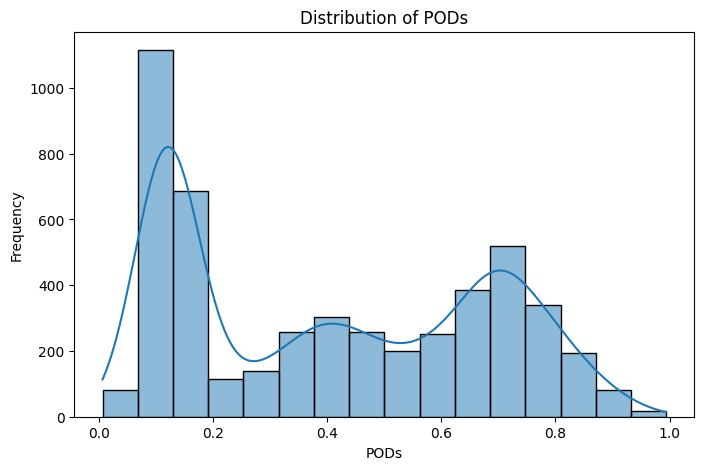

In [4]:
# For PODs
plt.figure(figsize=(8, 5))
sns.histplot(df['POD'], kde=True)
plt.title("Distribution of PODs")
plt.xlabel("PODs")
plt.ylabel("Frequency")
plt.show()

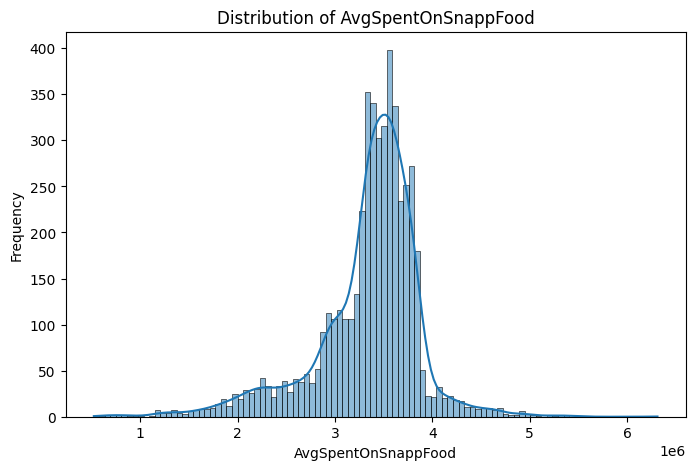

In [5]:
# For AvgSpentOnSnappFood
plt.figure(figsize=(8, 5))
sns.histplot(df['AvgSpentOnSnappFood'], kde=True)
plt.title("Distribution of AvgSpentOnSnappFood")
plt.xlabel("AvgSpentOnSnappFood")
plt.ylabel("Frequency")
plt.show()

According to z-score formula, calculate the z-score for the 'AvgSpentOnSnappFood' column per user,
<br/>
and add the z-score values as a new column named "z-score" to the data


In [6]:
#z-score formula: z = (x-μ)/σ
df['z-score'] = (df['AvgSpentOnSnappFood'] - df['AvgSpentOnSnappFood'].mean()) / df['AvgSpentOnSnappFood'].std()

Plot the distribution of z-scores:


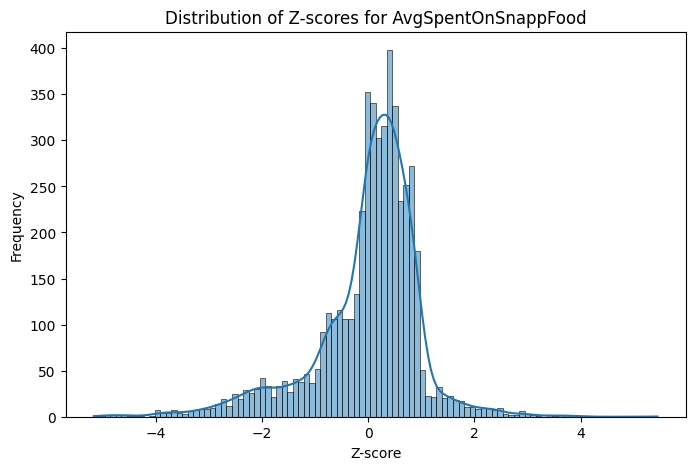

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['z-score'], kde=True)
plt.title("Distribution of Z-scores for AvgSpentOnSnappFood")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.show()

We want to analyze the behavior of abnormal users.
<br/>
How we can detect anomalies based on z-score? Find them and store them in a new dataframe called "anomalies"!


In [8]:
# Assuming anomalies are defined as those with |z-score| > 3
anomalies = df[(df['z-score'] > 3) | (df['z-score'] < -3)]
print("Anomalies detected:\n", anomalies)

Anomalies detected:
            POD  AvgSpentOnSnappFood   z-score
3314  0.243685         1.701763e+06 -3.004051
3328  0.226731         1.495169e+06 -3.382804
3335  0.206819         1.629557e+06 -3.136428
3348  0.276672         1.116485e+06 -4.077053
3399  0.171919         1.694917e+06 -3.016602
...        ...                  ...       ...
4797  0.828679         5.542240e+06  4.036765
4841  0.232159         7.701433e+05 -4.712007
4854  0.239790         8.558533e+05 -4.554873
4876  0.231918         1.321227e+06 -3.701694
4929  0.877633         5.314783e+06  3.619765

[83 rows x 3 columns]


Now the final move, plot the PODs for abnormal users.
<br/>
What does it mean? Write your opinion


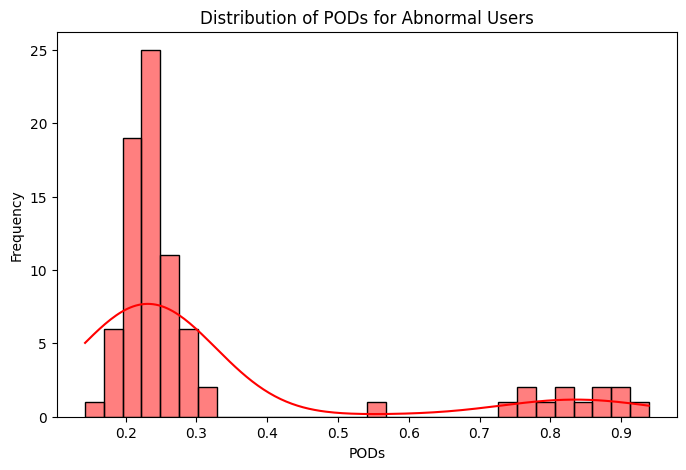

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(anomalies['POD'], kde=True, color="red")
plt.title("Distribution of PODs for Abnormal Users")
plt.xlabel("PODs")
plt.ylabel("Frequency")
plt.show()

YOUR OPINION HERE:
<br>
A few unusual users have low POD values ​​around 0.2-0.3. Also, some have POD values ​​close to 0.7-0.9. Therefore, the graph is divided into two groups of lower POD and higher POD values. 
If we consider that POD stands for *Proof of Delivery, it can be interpreted that for low POD values, users may have a low frequency of confirmed delivery. They may place large or scattered orders which could mean unusual buying behavior such users may have unpredictable spending patterns leading to their classification as an anomaly.
Also, high POD values ​​may indicate loyal, high-frequency users who both spend more and have a high number of confirmed deliveries.

In summary, the plot suggests that while high z-scores in spending correlate with higher default risk, the POD metric could provide additional insights into engagement and risk. Users with high spending but low POD values might be more unpredictable, while those with high spending and high POD values may be less risky due to their consistent engagement. so we can say that users with abnormal POD have abnormal z-score too.

*Proof of Delivery: is a document signed by the recipient to confirm the delivery of goods in a good condition.

### Thank you!